### 06 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트는 북미 피마 지역 원주민의 Type-2 당뇨병 결과 데이터이다. 보통 당뇨 원인으로 식습관과 유전을 꼽는다.

* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0 또는 1)

In [1]:
import os

In [2]:
os.getcwd()

'c:\\Users\\jongw\\OneDrive\\바탕 화면\\포트폴리오\\파이썬 머신러닝 완벽가이드\\python_ML_guide\\diabates'

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [5]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null 값이 없으며, 피처 타입은 모두 숫자형이다. \
임신횟수, 나이와 같은 숫자형 피처와 당뇨 검사 수치 피처로 구성된 특징으로 볼 때 별도의 피처 인코딩은 필요하지 않다.

In [9]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값. 칼럼 위치 -1을 이용해 추출

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1 스코어: {f1:.4f}, ROC AUC 스코어: {roc_auc:.4f}")

get_clf_eval(y_test, pred, pred_proba)


정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1 스코어: 0.6465, ROC AUC 스코어: 0.8083


예측 정확도가 77.27%, 재현율은 59.26%로 측정됐다. 전체 데이터의 65%가 Negatie이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞춰본다.

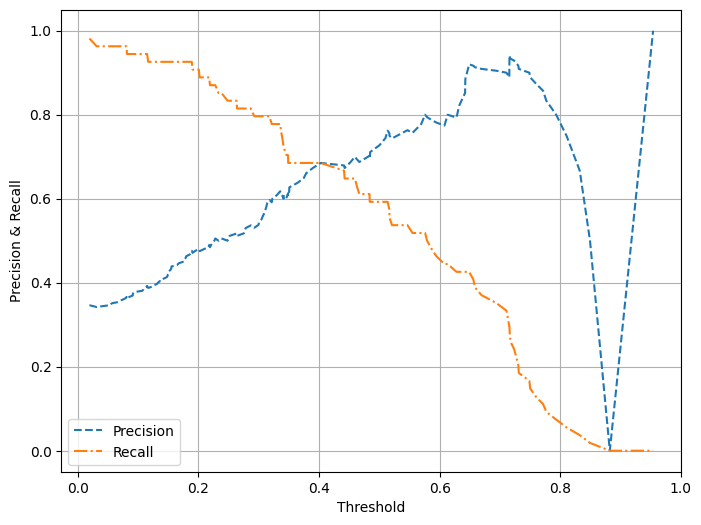

In [14]:
from sklearn.metrics import precision_recall_curve

#예측 확률 계산
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]

#정밀도-재현율 곡선 그리기 함수 정의
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precisions[1:], label = 'Precision', linestyle = '--')
    plt.plot(thresholds, recalls[1:], label = 'Recall', linestyle = '-.')
    
    # x축, y축 라벨 및 그리드 설정
    plt.xlabel('Threshold')
    plt.ylabel('Precision & Recall')
    plt.grid()

    plt.legend(loc = 'best')
    plt.show()
    
precision_recall_curve_plot(y_test, pred_proba_c1)

재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 것 같다.\
하지만 두 개의 지표 모두 0.7이 안되는 수치로 보인다. 여전히 두 지표의 값이 낮다.
임곗값을 인위적으로 조작하기 전에 다시 데이터 값을 점검한다.

In [15]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


diabetes_data.describe() 데이터 값을 보면 min() 값이 0으로 돼 있는 피처가 상당히 많다. 예를 들어 Glucose 피처는 포도당 수치인데 min값이 0인것은 말이 되지 않는다.\
Glucose 피처의 히스토그램을 확인해 보면 0값이 일정 수준 존재하는 것을 알 수 있다.

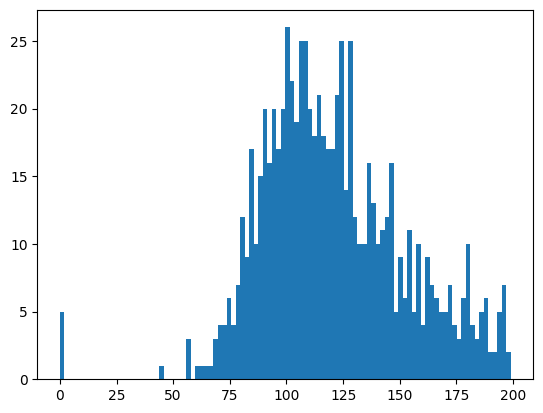

In [17]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

min() 값이 0으로 돼 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인해본다.\
확인할 피처는 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'이다.

In [18]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


In [19]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

0 값을 평균 값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환한다.\
로지스틱 회귀의 경우 일반적으로 숫자 데이터 스케일링을 적용하는 것이 좋다. \
이후 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인한다.

In [20]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state= 156, stratify = y)

#로지스틱 회귀로 학습, 에측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 스코어: 0.6804, ROC AUC 스코어: 0.8433


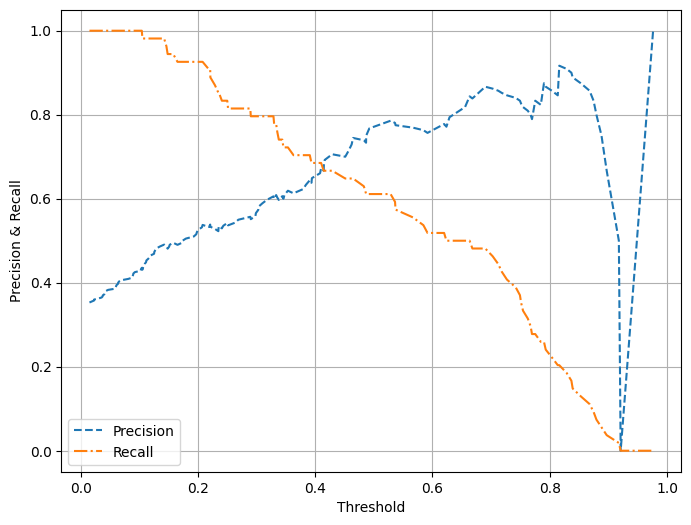

Threshold: 0.30
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1 스코어: 0.6615, ROC AUC 스코어: 0.8433
Threshold: 0.33
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1 스코어: 0.6774, ROC AUC 스코어: 0.8433
Threshold: 0.36
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1 스코어: 0.6667, ROC AUC 스코어: 0.8433
Threshold: 0.39
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1 스코어: 0.6667, ROC AUC 스코어: 0.8433
Threshold: 0.42
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1 스코어: 0.6792, ROC AUC 스코어: 0.8433
Threshold: 0.45
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1 스코어: 0.6857, ROC AUC 스코어: 0.8433
Threshold: 0.48
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 스코어: 0.6931, ROC AUC 스코어: 0.8433
Threshold: 0.50
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1 스코어: 0.6804, ROC AUC 스코어: 0.8433


In [25]:


thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]

# 예측 확률 계산
pred_proba = lr_clf.predict_proba(X_test)

# 특정 threshold에서 평가 수행하는 함수 정의
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for threshold in thresholds:
        binarized_pred = binarize_threshold(pred_proba_c1, threshold)
        print(f"Threshold: {threshold:.2f}")
        get_clf_eval(y_test, pred=binarized_pred, pred_proba=pred_proba_c1)  # pass pred_proba here

# threshold에 따라 예측값을 변환하는 함수 정의 (이전 코드와 동일)
def binarize_threshold(pred_proba_c1, threshold):
    return np.array([1 if proba >= threshold else 0 for proba in pred_proba_c1])

# 위에서 정의한 precision_recall_curve_plot 함수를 재사용하여 정밀도-재현율 곡선 그리기 (이전 코드와 동일)
precision_recall_curve_plot(y_test, pred_proba[:, 1])

# 평가 함수 정의 (이전 코드와 동일)
def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1 스코어: {f1:.4f}, ROC AUC 스코어: {roc_auc:.4f}")

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


#### 임곗값을 0.48로 설정한 Binarizer 생성

In [28]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1 스코어: 0.6931, ROC AUC 스코어: 0.8433


#### 07 정리

분류에 사용되는 정확도, 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC와 같은 성능 평가 지표.\
이진 분류의 레이블 값이 불균형하게 분포될 경우(0이 매우 많고, 1이 매우 적을 경우 또는 반대의 경우)

오차행렬은 Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True 와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가한다.\
정확도, 정밀도, 재현율 수치는 TN, FP, FN, TP 값을 다양하게 결합해 만들어지며, 이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습을 발생하는지 알 수 있다.\

정밀도(Precision)와 재현율(Recall)은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.\
특히 재현율이 상대적으로 더 중요한 지표인 경우, 암 양성 예측 모델과 같이 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우\
분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높이는 방법에 대해 배웠다.

F1 스코어는 정밀도와 재현율을 평가한 평가 지표이며, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 높은 지표값을 가지게 된다.\
ROC-AUC는 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표이다. AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로, 일반적으로 1에 가까울수록 좋은 수치이다.